In [4]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from scipy import linalg
from scipy.spatial import distance
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering
# Import ElbowVisualizer
#from yellowbrick.cluster import KElbowVisualizer
from collections import Counter

In [6]:
def check(a):
    try:
        r=float(a)
    except ValueError:
        r=np.nan
    return r

cols=(3,4,5,6,7,8,9,10,11,13,14,15,16,17)
data = np.loadtxt('data/TAD_ChIP_strength_fpkm_size_E1_interaction_twoborerexpression_innerfpkm.tsv',delimiter='\t',skiprows=1,usecols=cols,converters = {k: check for k in cols})
data_all = pd.read_csv('data/TAD_ChIP_strength_fpkm_size_E1_interaction_twoborerexpression_innerfpkm.tsv',sep='\t',usecols=cols)

In [7]:
data_full = data[~np.isnan(data).any(axis=1)]
data_all_full = data_all.loc[~np.isnan(data).any(axis=1),]
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
data_norm = np.apply_along_axis(NormalizeData,0,data_full)
data_norm_df = pd.DataFrame(data_norm,columns=list(data_all_full.columns))
# data_m = data/data.sum(axis=0,keepdims=1)*1000000
# mean = np.mean(data_m,axis=0)
# st_d = np.std(data_m,axis=0)
# distance_from_mean = abs(data_m-mean)
# max_d = 2
# not_out = distance_from_mean < max_d*st_d
# #no_out = data_m[not_out]
# print(mean)
# print(st_d)
# print(distance_from_mean)
# not_out
# no_out = data_m[np.sum(not_out,axis=1)>=10,:]
# print(data_m.shape)
# data_in = np.delete(data_m,10,1)
# print(data_in.shape)
# data_sq = distance.cdist(data_in,data_in,'sqeuclidean')
# data_cos = distance.cdist(data_in,data_in,'cosine')
# sum(np.sum(not_out,axis=1)<10)
# no_out.shape
# data_m.shape

In [28]:
data_all

,H3K9me3_RPKM,H3K36me3_RPKM,H3K4me1_RPKM,POU5F1_RPKM,H3K27me3_RPKM,NANOG_RPKM,CTCF_RPKM,H3K4me3_RPKM,strength,border_fpkm,size,interaction,0.001044909131
0,0.714689,3.081767,3.183183,0.762644,0.720414,0.993484,0.821859,2.843474,0.243850,0.0000,360000,0.001827,-0.005504
1,0.233456,3.438194,2.542468,0.842724,0.222650,1.005763,0.841192,2.932617,0.978933,84.5425,1360000,0.000961,-0.014799
2,0.700055,1.443003,0.285463,0.588748,0.461818,0.564777,0.681681,0.273189,0.351045,15.4850,680000,0.001943,0.000543
3,0.560486,0.379240,0.214082,0.618727,0.394839,0.622525,0.755855,0.260735,0.961099,0.0000,1240000,0.000388,-0.005020
4,1.578950,1.520725,1.213257,0.618981,0.360319,0.708752,0.778033,2.703058,0.395564,0.0000,1280000,0.000511,0.017624
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,0.490038,0.228688,0.050985,0.270249,0.301943,0.274235,0.277658,0.140347,NaN,0.5500,1600000,0.002794,0.021418
2726,0.322152,0.743417,0.417699,0.266026,0.195549,0.282633,0.281520,0.583895,NaN,5.2150,1120000,0.001205,0.021776
2727,0.212434,0.763016,0.243183,0.302321,0.161267,0.264311,0.275168,0.117783,NaN,11.1125,560000,0.005013,0.021251
2728,0.186370,0.683758,0.275398,0.248670,0.360685,0.235527,0.307614,0.782006,NaN,0.0000,720000,0.002492,0.021335


In [8]:
# clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
# y_pred = clustering.fit(no_out)
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    y_pred = AgglomerativeClustering(linkage='ward', n_clusters=k).fit(data_norm)
    sum_of_squared_distances.append(y_pred.inertia_)

AttributeError: 'AgglomerativeClustering' object has no attribute 'inertia_'

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

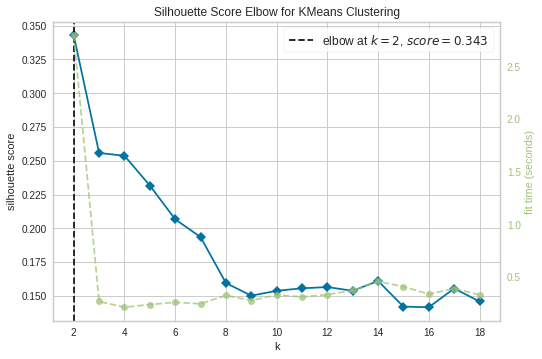

In [38]:
# Silhouette Score for AgglomerativeClustering

model = AgglomerativeClustering(linkage='ward')
model_k = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model_k, k=(2,19),metric='silhouette', timings= True)
visualizer.fit(data_norm)        # Fit the data to the visualizer
visualizer.show(outpath='./results/all_kmeans_elbow.pdf')        # Finalize and render the figure

In [9]:
y_pred = KMeans(n_clusters=2).fit(data_norm)
labels = y_pred.labels_
data_norm_df['clusters'] = labels

In [10]:
#data_summary = data_norm_df.groupby('clusters').mean()
data_var = data_norm_df.groupby('clusters').var()
data_all_var = data_norm_df.var()*(len(data_norm_df.index)-1)

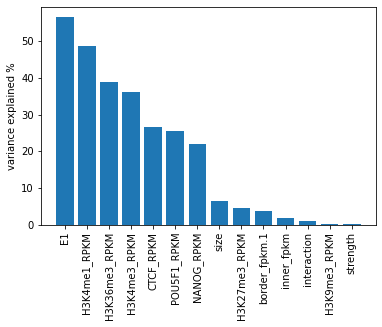

In [11]:
# print(data_var)
# print(data_all_var)

for i,r in data_var.iterrows():
    data_var.iloc[i] = data_var.iloc[i]* (Counter(data_norm_df['clusters'])[i]-1)
yita_square = (data_all_var-data_var.sum())/data_all_var
yita_square.drop('clusters',inplace=True)
yita_square = yita_square.sort_values(ascending=False)
plt.bar(x=yita_square.index,height=yita_square*100)
plt.ylabel('variance explained %')
plt.xticks(rotation=90)
plt.savefig('results/yita_square.pdf',bbox_inches='tight')
#yita_square.to_csv('yita_square.tsv',sep='\t')

In [18]:
af = AffinityPropagation(max_iter=20000).fit(data_m)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Estimated number of clusters: 107
Silhouette Coefficient: 0.190


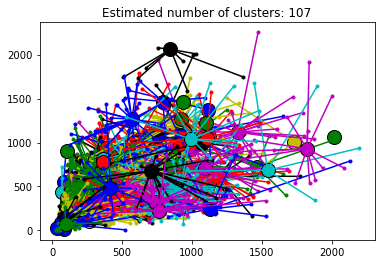

In [15]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data_m, labels, metric='sqeuclidean'))
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = data_m[cluster_centers_indices[k]]
    plt.plot(data_m[class_members, 0], data_m[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in data_m[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [5]:
# sum_of_squared_distances = []
# K = range(1,20)
# for k in K:
#     y_pred = KMeans(n_clusters=k, random_state=170,max_iter=3000,precompute_distances=True,algorithm='full').fit(no_out)
#     sum_of_squared_distances.append(y_pred.inertia_)

IndentationError: unexpected indent (<ipython-input-5-ca8c8f670d05>, line 6)

In [38]:
#from sklearn.metrics import pairwise_distances
labels = y_pred.labels_
print(metrics.silhouette_score(no_out, labels, metric='euclidean'))
print(metrics.calinski_harabasz_score(no_out, labels))
print(metrics.davies_bouldin_score(no_out, labels))

0.39211135459923563
1042.727862214212
0.8733112664993568


In [25]:
cluster_centers_indices = af.cluster_centers_indices_
labels = y_pred.labels_

n_clusters_ = 3
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data_m, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Silhouette Coefficient: 0.955


In [72]:
y_pred_4 = KMeans(n_clusters=4, random_state=170,max_iter=3000,precompute_distances=False,algorithm='full').fit(data_cos)
labels = y_pred_4.labels_
metrics.silhouette_score(data_m, labels, metric='cosine')

/home/data4/jh/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)


0.12796702195732174

In [28]:
y_pred_2 = KMeans(n_clusters=4, random_state=170,max_iter=3000,precompute_distances=True,algorithm='full').fit(data_cos)
labels = y_pred_2.labels_
metrics.silhouette_score(data_m, labels, metric='euclidean')

/home/data4/jh/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)


0.27433390072807706

In [73]:
y_pred_5 = KMeans(n_clusters=5, random_state=170,max_iter=3000,precompute_distances=False,algorithm='full').fit(data_cos)
labels = y_pred_5.labels_
metrics.silhouette_score(data_m, labels, metric='cosine')

/home/data4/jh/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)


0.0778373897310519

In [75]:
y_pred_10 = KMeans(n_clusters=10, random_state=170,max_iter=3000,precompute_distances=False,algorithm='full').fit(data_cos)
labels = y_pred_10.labels_
metrics.silhouette_score(data_m, labels, metric='cosine')

/home/data4/jh/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)


-0.011661879058831124

In [30]:
y_pred_10 = KMeans(n_clusters=10, random_state=170,max_iter=3000,precompute_distances=True,algorithm='full').fit(data_m)
labels = y_pred_6.labels_
metrics.silhouette_score(data_m, labels, metric='euclidean')

/home/data4/jh/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)


0.2484567054181766

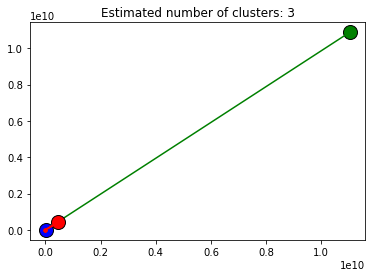

In [41]:
plt.close('all')
plt.figure(1)
plt.clf()

cluster_center_all = y_pred.cluster_centers_
n_clusters_=3
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = cluster_center_all[k]
    plt.plot(data_m[class_members, 0], data_m[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in data_m[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [124]:
np.bincount(labels)

array([995,  74,  10, 846])

In [56]:
unique, counts = np.unique(labels, return_counts=True)

In [57]:
np.asarray((unique, counts)).T

array([[   0, 2112],
       [   1,    1],
       [   2,    4]])

In [39]:
data_sq = distance.cdist(no_out,no_out,'sqeuclidean')
y_pred = KMeans(n_clusters=4, random_state=170,max_iter=3000,precompute_distances=False,algorithm='full').fit(data_sq)
from sklearn.metrics import pairwise_distances
labels = y_pred.labels_
metrics.silhouette_score(no_out, labels, metric='sqeuclidean')

/home/data4/jh/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)


0.9382907209312528

In [132]:
np.bincount(labels)

array([1915,    1,    6,    3])

In [137]:
# data_sq = distance.cdist(no_out,no_out,'cosine')
# y_pred = KMeans(n_clusters=4, random_state=170,max_iter=3000,precompute_distances=False,algorithm='full').fit(data_sq)
# from sklearn.metrics import pairwise_distances
# labels = y_pred.labels_
# metrics.silhouette_score(no_out, labels, metric='cosine')
metrics.calinski_harabasz_score(no_out, labels)

380.11353874938794

In [147]:
np.bincount(labels)

array([995,  74,  10, 846])

In [145]:
data_all = pd.read_csv('TAD_ChIP_strength_fpkm_size_E1_interaction.tsv',delimiter='\t')
data_all.loc[np.sum(not_out,axis=1)<10,:].to_csv('outliers.tsv',sep='\t',index=False,quoting=3)

In [151]:
data_not_out = data_all.loc[np.sum(not_out,axis=1)>=10,:].reset_index(drop=True)

In [152]:
data_not_out.loc[labels==0,:].to_csv('Cluster1.tsv',sep='\t',index=False,quoting=3)
data_not_out.loc[labels==1,:].to_csv('Cluster2.tsv',sep='\t',index=False,quoting=3)
data_not_out.loc[labels==2,:].to_csv('Cluster3.tsv',sep='\t',index=False,quoting=3)
data_not_out.loc[labels==3,:].to_csv('Cluster4.tsv',sep='\t',index=False,quoting=3)

In [5]:
chromosome = ['chr'+ i for i in [str(i) for i in range(1,20)]]
chromosome.append('chrX')
def to_borders(C1,name):
#C1 = data_not_out.loc[labels==0,:]
    for chrom in chromosome:
        data_chr = C1.loc[C1.chrom==chrom]
        borders_start = np.sort(np.unique(np.append(data_chr.start.to_numpy()-40000,data_chr.end.to_numpy())))
        borders_end = borders_start+40000
        with open(f'{name}_borders.bed','a') as fo:
            for i in range(len(borders_start)):
                fo.write(f'{chrom}\t{borders_start[i]}\t{borders_end[i]}\n')

In [6]:
# to_borders(data_not_out.loc[labels==1,:],'C2')
# to_borders(data_not_out.loc[labels==2,:],'C3')
# to_borders(data_not_out.loc[labels==3,:],'C4')
# to_borders(cluster1,'C1')
# to_borders(cluster2,'C2')
# to_borders(cluster3,'C3')
to_borders(cluster4,'C4')

In [26]:
np.bincount(labels)

array([ 74, 995,  10, 846])

In [3]:
cluster1 = pd.read_csv('Cluster1.tsv',sep='\t')
cluster2 = pd.read_csv('Cluster2.tsv',sep='\t')
cluster3 = pd.read_csv('Cluster3.tsv',sep='\t')
cluster4 = pd.read_csv('Cluster4.tsv',sep='\t')

In [4]:
cluster1

,chrom,start,end,H3K9me3_RPKM,H3K36me3_RPKM,H3K4me1_RPKM,POU5F1_RPKM,H3K27me3_RPKM,NANOG_RPKM,CTCF_RPKM,H3K4me3_RPKM,strength,border_fpkm,size,E1,interaction
0,chr1,4840000,6200000,0.233456,3.438194,2.542468,0.842724,0.222650,1.005763,0.841192,2.932617,0.978933,91.231667,1360000,0.07829,0.000961
1,chr1,6240000,9520000,0.435774,1.520725,1.213257,0.618981,0.360319,0.708752,0.778033,2.703058,0.351045,31.853333,3280000,-0.02723,0.000281
2,chr1,10200000,11600000,0.646473,1.251942,0.622932,0.676496,0.860671,0.715203,0.706546,1.531882,0.395564,18.353333,1400000,0.21647,0.000793
3,chr1,11640000,12880000,0.572610,0.446741,0.427702,0.692599,0.597821,0.732838,0.633217,0.336628,0.257416,0.000000,1240000,0.09494,0.001837
4,chr1,13720000,14920000,0.607007,0.343681,0.200717,0.511361,0.482396,0.522088,0.521668,0.271422,0.475495,0.000000,1200000,0.13217,0.001599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,chrX,144360000,145720000,0.172334,2.196838,0.845909,0.337430,0.109913,0.293172,0.304121,0.301157,0.530302,42.318332,1360000,0.01206,0.000593
991,chrX,145760000,151120000,0.179697,0.297215,1.017094,0.361050,0.153628,0.395175,0.419110,0.314871,0.222571,0.000000,5360000,0.02647,0.000368
992,chrX,155440000,157680000,0.298138,0.166630,0.050662,0.290185,0.338044,0.304269,0.318486,0.101881,0.699313,0.000000,2240000,-0.11470,0.000423
993,chrX,162920000,164480000,0.272645,0.989574,0.348844,0.313846,0.189321,0.411017,0.398011,0.146443,1.224054,0.000000,1560000,0.32683,0.000752


In [7]:
#clusters_data = pd.DataFrame()
#clusters_data['strength'] = cluster1['strength'].append(cluster2['strength'],ignore_index=True).append(cluster3['strength'],ignore_index=True).append(cluster4['strength'],ignore_index=True)
#clusters_data['E1'] = cluster1['E1'].append(cluster2['E1'],ignore_index=True).append(cluster3['E1'],ignore_index=True).append(cluster4['E1'],ignore_index=True)
clusters_data['interaction'] = cluster1['interaction'].append(cluster2['interaction'],ignore_index=True).append(cluster3['interaction'],ignore_index=True).append(cluster4['interaction'],ignore_index=True)

In [22]:
clusters_data['Cluster'] = ['C1']*len(cluster1.index)+['C2']*len(cluster2.index)+['C3']*len(cluster3.index)+['C4']*len(cluster4.index)

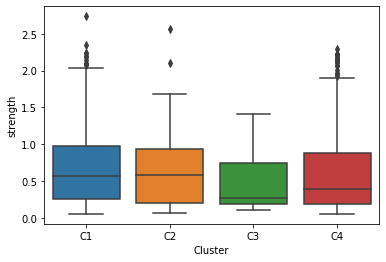

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Cluster',y='strength',data=clusters_data)
plt.savefig('Strength.pdf',bbox_inches='tight')

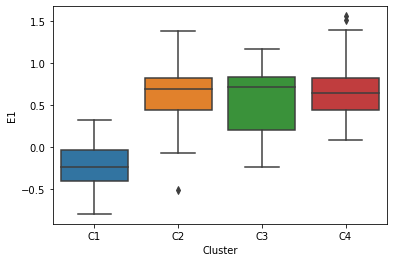

In [28]:
sns.boxplot(x='Cluster',y='E1',data=clusters_data)
plt.savefig('E1.pdf',bbox_inches='tight')

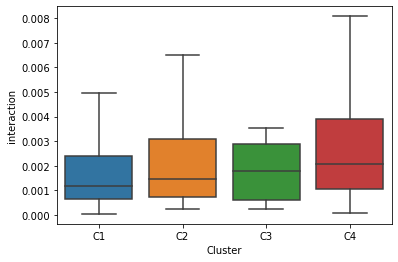

In [31]:
sns.boxplot(x='Cluster',y='interaction',data=clusters_data,showfliers=False)
plt.savefig('interaction.pdf',bbox_inches='tight')

In [10]:
sum_of_squared_distances = []
K = range(2,20)
for k in K:
    clustering = AgglomerativeClustering(linkage='ward', n_clusters=k)
    y_pred = clustering.fit(data_in)
    print(metrics.silhouette_score(data_in, y_pred.labels_, metric='euclidean'))

0.9830970015463847
0.877537711472585
0.6977751663255006
0.19274783594698514
0.1941219408405675
0.18985843562847451
0.19968211048321394
0.17696571664510335
0.1833430955436583
0.13490042160669882
0.13859298375979218
0.13672467736002766
0.10294540340662507
0.10487184975292081
0.10966077625046967
0.10972392223802321
0.10849951346739599
0.108728388719928


In [17]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=9)
y_pred = clustering.fit(data_in)
from collections import Counter
Counter(y_pred.labels_)

Counter({8: 80, 2: 166, 0: 977, 1: 566, 3: 268, 4: 41, 6: 4, 5: 14, 7: 1})